In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import datetime as dt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
 
%matplotlib inline

## 数据读取

In [3]:
off_train = pd.read_csv(
    'data/ccf_offline_stage1_train.csv', keep_default_na=True)
off_train.columns = ['user_id', 'merchant_id', 'coupon_id',
                     'discount_rate', 'distance', 'date_received', 'date']
off_test = pd.read_csv(
    'data/ccf_offline_stage1_test_revised.csv', keep_default_na=True)
off_test.columns = ['user_id', 'merchant_id', 'coupon_id',
                    'discount_rate', 'distance', 'date_received']
on_train = pd.read_csv(
    'data/ccf_online_stage1_train.csv', keep_default_na=True)
on_train.columns = ['user_id', 'merchant_id', 'action',
                    'coupon_id', 'discount_rate', 'date_received', 'date']
off_train[['user_id', 'merchant_id', 'coupon_id']] = off_train[[
    'user_id', 'merchant_id', 'coupon_id']].astype(str)
off_test[['user_id', 'merchant_id', 'coupon_id']] = off_test[[
    'user_id', 'merchant_id', 'coupon_id']].astype(str)
on_train[['user_id', 'merchant_id', 'coupon_id']] = on_train[[
    'user_id', 'merchant_id', 'coupon_id']].astype(str)


In [4]:
off_train.head()

,user_id,merchant_id,coupon_id,discount_rate,distance,date_received,date
0,1439408,2632,nan,NaN,0.0,NaN,20160217.0
1,1439408,4663,11002.0,150:20,1.0,20160528.0,NaN
2,1439408,2632,8591.0,20:1,0.0,20160217.0,NaN
3,1439408,2632,1078.0,20:1,0.0,20160319.0,NaN
4,1439408,2632,8591.0,20:1,0.0,20160613.0,NaN


In [5]:
on_train.head()

,user_id,merchant_id,action,coupon_id,discount_rate,date_received,date
0,13740231,18907,2,100017492,500:50,20160513.0,NaN
1,13740231,34805,1,nan,NaN,NaN,20160321.0
2,14336199,18907,0,nan,NaN,NaN,20160618.0
3,14336199,18907,0,nan,NaN,NaN,20160618.0
4,14336199,18907,0,nan,NaN,NaN,20160618.0


In [6]:
off_test.head()

,user_id,merchant_id,coupon_id,discount_rate,distance,date_received
0,4129537,450,9983,30:5,1.0,20160712
1,6949378,1300,3429,30:5,NaN,20160706
2,2166529,7113,6928,200:20,5.0,20160727
3,2166529,7113,1808,100:10,5.0,20160727
4,6172162,7605,6500,30:1,2.0,20160708


In [7]:
off_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754884 entries, 0 to 1754883
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        object 
 1   merchant_id    object 
 2   coupon_id      object 
 3   discount_rate  object 
 4   distance       float64
 5   date_received  float64
 6   date           float64
dtypes: float64(3), object(4)
memory usage: 93.7+ MB


In [8]:
on_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11429826 entries, 0 to 11429825
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        object 
 1   merchant_id    object 
 2   action         int64  
 3   coupon_id      object 
 4   discount_rate  object 
 5   date_received  float64
 6   date           float64
dtypes: float64(2), int64(1), object(4)
memory usage: 610.4+ MB


In [9]:
off_train.describe()

,distance,date_received,date
count,1.648881e+06,1.053282e+06,7.769840e+05
mean,2.361636e+00,2.016032e+07,2.016040e+07
std,3.483974e+00,1.771416e+02,1.621500e+02
min,0.000000e+00,2.016010e+07,2.016010e+07
25%,0.000000e+00,2.016013e+07,2.016031e+07
50%,0.000000e+00,2.016032e+07,2.016042e+07
75%,3.000000e+00,2.016051e+07,2.016052e+07
max,1.000000e+01,2.016062e+07,2.016063e+07


In [10]:
off_train.isnull().sum()

user_id               0
merchant_id           0
coupon_id             0
discount_rate    701602
distance         106003
date_received    701602
date             977900
dtype: int64

In [11]:
on_train.isnull().sum()

user_id                 0
merchant_id             0
action                  0
coupon_id               0
discount_rate    10557469
date_received    10557469
date               655898
dtype: int64

## 数据初步分析

In [12]:
#重新读取数据，将null原样保持，方便处理
off_train = pd.read_csv('data/ccf_offline_stage1_train.csv',keep_default_na=False)
off_train.columns=['user_id','merchant_id','coupon_id','discount_rate','distance','date_received','date']
off_test = pd.read_csv('data/ccf_offline_stage1_test_revised.csv',keep_default_na=False)
off_test.columns = ['user_id','merchant_id','coupon_id','discount_rate','distance','date_received']
on_train = pd.read_csv('data/ccf_online_stage1_train.csv',keep_default_na=False)
on_train.columns = ['user_id','merchant_id','action','coupon_id','discount_rate','date_received','date']
off_train[['user_id','merchant_id','coupon_id']]=off_train[['user_id','merchant_id','coupon_id']].astype(str)
off_test[['user_id','merchant_id','coupon_id']]=off_test[['user_id','merchant_id','coupon_id']].astype(str)
on_train[['user_id','merchant_id','coupon_id']]=on_train[['user_id','merchant_id','coupon_id']].astype(str)

In [16]:
off_train.head()

,user_id,merchant_id,coupon_id,discount_rate,distance,date_received,date
0,1439408,2632,null,null,0,null,20160217
1,1439408,4663,11002,150:20,1,20160528,null
2,1439408,2632,8591,20:1,0,20160217,null
3,1439408,2632,1078,20:1,0,20160319,null
4,1439408,2632,8591,20:1,0,20160613,null


In [20]:
print('offline train data_received')
print(off_train[off_train['date_received'] !='null']['date_received'].min())
print(off_train[off_train['date_received'] !='null']['date_received'].max())
print('online train data_received')
print(on_train[on_train['date_received'] !='null']['date_received'].min())
print(on_train[on_train['date_received'] !='null']['date_received'].max())
print('test data_received')
print(off_test[off_test['date_received'] !='null']['date_received'].min())
print(off_test[off_test['date_received'] !='null']['date_received'].max())

offline train data_received
20160101
20160615
online train data_received
20160101
20160615
test data_received
20160701
20160731


In [21]:
print('offline train date')
print(off_train[off_train['date']!='null']['date'].min())
print(off_train[off_train['date']!='null']['date'].max())

print('online train date')
print(on_train[on_train['date']!='null']['date'].min())
print(on_train[on_train['date']!='null']['date'].max())

offline train date
20160101
20160630
online train date
20160101
20160630


## 训练集与测试集的相关性

在机器学习比赛及实际应用的时候，不同数据的价值是不一样的，同时也并不是所有得到的数据都是有用的。对测试集和训练集数据的重合情况进行探查对于后续的特征构建的思路有很大的指导作用。

In [22]:
off_train_user = off_train[['user_id']].copy().drop_duplicates()
off_test_user = off_test[['user_id']].copy().drop_duplicates()
on_train_user = on_train[['user_id']].copy().drop_duplicates()
print('offline train data user counts')
print(off_train.user_id.count())
print('online train data user counts')
print(on_train.user_id.count())
print('offline test data user counts')
print(off_test.user_id.count())

offline train data user counts
1754884
online train data user counts
11429826
offline test data user counts
113640


In [23]:
off_train_user['off_train_flag'] = 1
off_merge = off_test_user.merge(off_train_user, on='user_id', how='left').reset_index().fillna(0)

In [25]:
print ('offline 训练集用户与测试集用户重复数量')
print(off_merge['off_train_flag'].sum())
print ('offline 训练集用户与测试集重复用户在总测试集用户中的占比')
print(off_merge['off_train_flag'].sum()/off_merge['off_train_flag'].count())
on_train_user['on_train_flag']=1
on_merge=off_test_user.merge(on_train_user,on='user_id', how="left").reset_index().fillna(0)
print ('online 训练集用户与测试集用户重复数量')
print(on_merge['on_train_flag'].sum())
print ('online 训练集用户与测试集重复用户在总测试集用户中的占比')
print(on_merge['on_train_flag'].sum()/on_merge['on_train_flag'].count())

offline 训练集用户与测试集用户重复数量
76307.0
offline 训练集用户与测试集重复用户在总测试集用户中的占比
0.9999737907717308
online 训练集用户与测试集用户重复数量
43155.0
online 训练集用户与测试集重复用户在总测试集用户中的占比
0.5655296229802513


In [26]:
#查看online offline 训练集的 merchant_id 与测试集的重合度
off_train_merchant=off_train[['merchant_id']].copy().drop_duplicates()
off_test_merchant=off_test[['merchant_id']].copy().drop_duplicates()
on_train_merchant=on_train[['merchant_id']].copy().drop_duplicates()
print ('offline 训练集商家ID数量')
print (off_train_merchant.merchant_id.count())
print ('online 训练集商家ID数量')
print (on_train_merchant.merchant_id.count())
print ('offline 测试集商家ID数量')
print (off_test_merchant.merchant_id.count())

off_train_merchant['off_train_flag']=1
off_merge=off_test_merchant.merge(off_train_merchant,on='merchant_id', how="left").reset_index().fillna(0)
print ('offline 训练集商家与测试集商家重复数量')
print(off_merge['off_train_flag'].sum())
print ('offline 训练集商家与测试集重复商家在总测试集商家中的占比')
print(off_merge['off_train_flag'].sum()/off_merge['off_train_flag'].count())

on_train_merchant['on_train_flag']=1
on_merge=off_test_merchant.merge(on_train_merchant,on='merchant_id', how="left").reset_index().fillna(0)
print ('online 训练集商家与测试集商家重复数量')
print(on_merge['on_train_flag'].sum())
print ('online 训练集商家与测试集重复商家在总测试集商家中的占比')
print(on_merge['on_train_flag'].sum()/on_merge['on_train_flag'].count())

offline 训练集商家ID数量
8415
online 训练集商家ID数量
7999
offline 测试集商家ID数量
1559
offline 训练集商家与测试集商家重复数量
1558.0
offline 训练集商家与测试集重复商家在总测试集商家中的占比
0.9993585631815266
online 训练集商家与测试集商家重复数量
0.0
online 训练集商家与测试集重复商家在总测试集商家中的占比
0.0


In [27]:
#查看online offline 训练集的 coupon_id 与测试集的重合度
off_train_coupon=off_train[['coupon_id']].copy().drop_duplicates()
off_test_coupon=off_test[['coupon_id']].copy().drop_duplicates()
on_train_coupon=on_train[['coupon_id']].copy().drop_duplicates()
print ('offline 训练集优惠券ID数量')
print (off_train_coupon.coupon_id.count())
print ('online 训练集优惠券ID数量')
print (on_train_coupon.coupon_id.count())
print ('offline 测试集优惠券ID数量')
print (off_test_coupon.coupon_id.count())

off_train_coupon['off_train_flag']=1
off_merge=off_test_coupon.merge(off_train_coupon,on='coupon_id', how="left").reset_index().fillna(0)
print ('offline 训练集优惠券与测试集优惠券重复数量')
print(off_merge['off_train_flag'].sum())
print ('offline 训练集优惠券与测试集重复优惠券在总测试集优惠券中的占比')
print(off_merge['off_train_flag'].sum()/off_merge['off_train_flag'].count())

on_train_coupon['on_train_flag']=1
on_merge=off_test_coupon.merge(on_train_coupon,on='coupon_id', how="left").reset_index().fillna(0)
print ('online 训练集优惠券与测试集优惠券重复数量')
print(on_merge['on_train_flag'].sum())
print ('online 训练集优惠券与测试集重复优惠券在总测试集优惠券中的占比')
print(on_merge['on_train_flag'].sum()/on_merge['on_train_flag'].count())

offline 训练集优惠券ID数量
9739
online 训练集优惠券ID数量
27748
offline 测试集优惠券ID数量
2050
offline 训练集优惠券与测试集优惠券重复数量
1118.0
offline 训练集优惠券与测试集重复优惠券在总测试集优惠券中的占比
0.5453658536585366
online 训练集优惠券与测试集优惠券重复数量
0.0
online 训练集优惠券与测试集重复优惠券在总测试集优惠券中的占比
0.0


## 数据分布

In [29]:
off_train['discount_rate'].value_counts()

null       701602
30:5       270712
100:10     182554
200:20     111046
20:5        91013
20:1        51705
50:5        47379
100:30      38196
200:30      29327
300:30      28979
50:10       28452
10:5        25925
0.95        20568
10:1        17842
30:1        17654
150:20      17437
100:20      14297
30:10       12692
50:20        8203
0.9          8085
200:50       5585
150:10       5325
100:5        5053
0.8          3441
50:1         3354
5:1          2526
100:50       1774
150:30        654
0.85          649
200:10        575
100:1         537
20:10         514
150:50        306
300:50        206
0.5           186
0.75          121
0.2           110
0.6            58
200:5          57
300:20         56
0.7            54
30:20          24
300:10         23
200:100        12
50:30           9
150:5           7
Name: discount_rate, dtype: int64

<AxesSubplot:ylabel='discount_rate'>

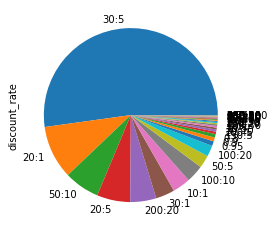

In [34]:
off_test['discount_rate'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='distance'>

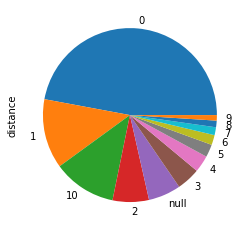

In [36]:
off_train['distance'].value_counts().plot(kind ='pie')

<AxesSubplot:ylabel='distance'>

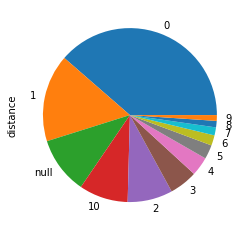

In [37]:
off_test['distance'].value_counts().plot(kind ='pie')

## 特征数值化

In [41]:
#分隔符
separator=':'
#计算折扣率，将满减和折扣统一
#因为discount_rate为null的时候一般都是没有使用优惠券，这个时候折扣应该是1
def get_discount_rate(s):
    s = str(s)
    if s=='null':
        return -1
        #return 1
    s = s.split(separator)
    if len(s) == 1:
        return float(s[0])
    else:
        return 1.0-float(s[1])/float(s[0])

#获取是否满减（full reduction promotion）
def get_if_fd(s):
    s = str(s)
    s = s.split(separator)
    if len(s)==1:
        return 0
    else:
        return 1
        
#获取满减的条件
def get_full_value(s):
    s = str(s)
    s = s.split(separator)
    if len(s)==1:
        return -1
    else:
        return int(s[0])
        
#获取满减的优惠     
def get_reduction_value(s):
    s = str(s)
    s = s.split(separator)
    if len(s) == 1:
        return -1
    else:
        return int(s[1])


#获取月份
def get_month(s):
    if s[0]=='null':
        return -1
    else:    
        return int(s[4:6])

#获取日期
def get_day(s):
    if s[0]=='null':
        return -1
    else:    
        return int(s[6:8])
    
#获取日期间隔输入内容为Date:Date_received
def get_day_gap(s):
    s = s.split(separator)
    if s[0]=='null':
        return -1
    if s[1]=='null':
        return -1
    else:    
        return (date(int(s[0][0:4]),int(s[0][4:6]),int(s[0][6:8])) - date(int(s[1][0:4]),int(s[1][4:6]),int(s[1][6:8]))).days

#获取Label，输入内容为Date:Date_received
def get_label(s):
    s = s.split(separator)
    if s[0]=='null':
        return 0
    if s[1]=='null':
        return -1
    elif (date(int(s[0][0:4]),int(s[0][4:6]),int(s[0][6:8]))-date(int(s[1][0:4]),int(s[1][4:6]),int(s[1][6:8]))).days<=15:
        return 1
    else:
        return -1

In [38]:
def add_feature(df):
    df['if_fd']=df['discount_rate'].apply(get_if_fd)
    df['full_value']=df['discount_rate'].apply(get_full_value)
    df['reduction_value']=df['discount_rate'].apply(get_reduction_value)
    df['discount_rate']=df['discount_rate'].apply(get_discount_rate)
    df['distance']=df['distance'].replace('null',-1).astype(int)
    #df['month_received'] = df['date_received'].apply(get_month)
    #df['month'] = df['date'].apply(get_month)
    return df
    
def add_label(df):
    df['day_gap']=df['date'].astype('str') + ':' +  df['date_received'].astype('str')
    df['label']=df['day_gap'].apply(get_label)
    df['day_gap']=df['day_gap'].apply(get_day_gap)
    return df

In [39]:
df_train = off_train.copy()
df_test = off_test.copy()

In [42]:
df_train=add_feature(df_train)
df_train=add_label(df_train)
df_test=add_feature(df_test)

## 数据分析

In [43]:
df_train.head()

,user_id,merchant_id,coupon_id,discount_rate,distance,date_received,date,if_fd,full_value,reduction_value,day_gap,label
0,1439408,2632,null,-1.000000,0,null,20160217,0,-1,-1,-1,-1
1,1439408,4663,11002,0.866667,1,20160528,null,1,150,20,-1,0
2,1439408,2632,8591,0.950000,0,20160217,null,1,20,1,-1,0
3,1439408,2632,1078,0.950000,0,20160319,null,1,20,1,-1,0
4,1439408,2632,8591,0.950000,0,20160613,null,1,20,1,-1,0


In [44]:
df_train.describe()

,discount_rate,distance,if_fd,full_value,reduction_value,day_gap,label
count,1.754884e+06,1.754884e+06,1.754884e+06,1.754884e+06,1.754884e+06,1.754884e+06,1.754884e+06
mean,1.069696e-01,2.158577e+00,5.812407e-01,4.665974e+01,5.807668e+00,-6.212582e-01,-3.693657e-01
std,9.061683e-01,3.470772e+00,4.933559e-01,6.830349e+01,9.037305e+00,2.414021e+00,5.534657e-01
min,-1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,-1.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
50%,7.500000e-01,0.000000e+00,1.000000e+00,2.000000e+01,5.000000e+00,-1.000000e+00,0.000000e+00
75%,9.000000e-01,3.000000e+00,1.000000e+00,1.000000e+02,1.000000e+01,-1.000000e+00,0.000000e+00
max,9.900000e-01,1.000000e+01,1.000000e+00,3.000000e+02,1.000000e+02,9.600000e+01,1.000000e+00


In [45]:
df_test.head()

,user_id,merchant_id,coupon_id,discount_rate,distance,date_received,if_fd,full_value,reduction_value
0,4129537,450,9983,0.833333,1,20160712,1,30,5
1,6949378,1300,3429,0.833333,-1,20160706,1,30,5
2,2166529,7113,6928,0.900000,5,20160727,1,200,20
3,2166529,7113,1808,0.900000,5,20160727,1,100,10
4,6172162,7605,6500,0.966667,2,20160708,1,30,1


<AxesSubplot:ylabel='distance'>

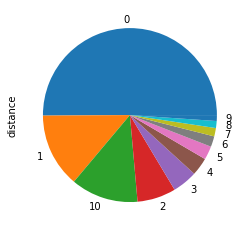

In [48]:
df_train[df_train.distance>=0]['distance'].value_counts().plot(kind='pie')

In [49]:
df_train[(df_train.label>=0)&(df_train.distance>=0)]['distance'].value_counts()/df_train[(df_train.label>=0)&(df_train.distance>=0)]['distance'].count()

0     0.364509
10    0.183892
1     0.152033
2     0.086069
3     0.058229
4     0.042997
5     0.032928
6     0.026195
7     0.020890
8     0.017433
9     0.014824
Name: distance, dtype: float64

In [51]:
print ('Offline 训练集满减情况')
df_train.if_fd.value_counts()/df_train.if_fd.count()

Offline 训练集满减情况


1    0.581241
0    0.418759
Name: if_fd, dtype: float64

<AxesSubplot:xlabel='distance'>

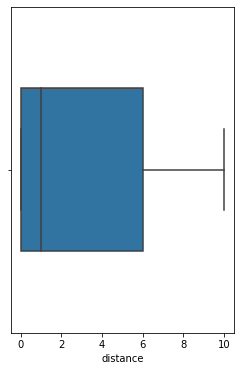

In [57]:
fig = plt.figure(figsize=(4, 6))  # 指定绘图对象宽度和高度
sns.boxplot(df_train[(df_train.label>=0)&(df_train.distance>=0)]['distance'], width=0.5)

<AxesSubplot:xlabel='discount_rate'>

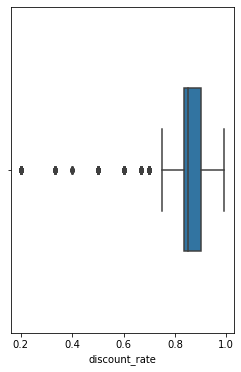

In [58]:
fig = plt.figure(figsize=(4, 6))  # 指定绘图对象宽度和高度
sns.boxplot(df_train[(df_train.label>=0)&(df_train.discount_rate>=0)]['discount_rate'],orient="v", width=0.5)

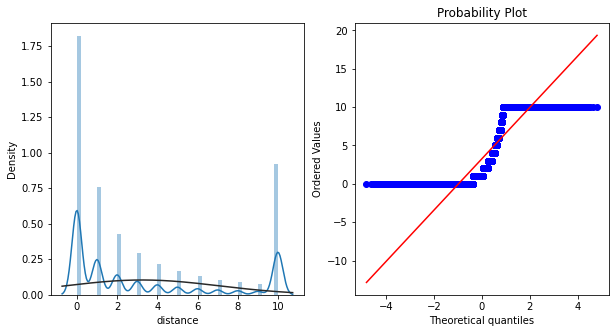

In [59]:
plt.figure(figsize=(10,5))

ax=plt.subplot(1,2,1)
sns.distplot(df_train[(df_train.label>=0)&(df_train.distance>=0)]['distance'],fit=stats.norm)
ax=plt.subplot(1,2,2)
res = stats.probplot(df_train[(df_train.label>=0)&(df_train.distance>=0)]['distance'], plot=plt)

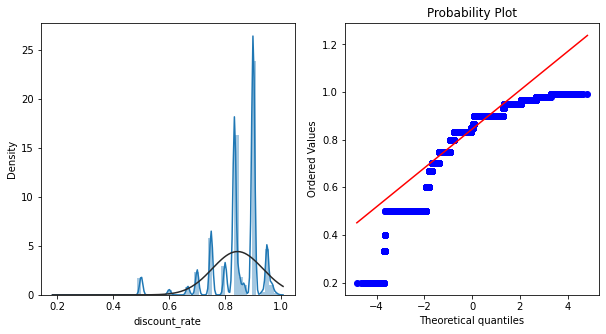

In [60]:
plt.figure(figsize=(10,5))

ax=plt.subplot(1,2,1)
sns.distplot(df_train[(df_train.label>=0)&(df_train.discount_rate>=0)]['discount_rate'],fit=stats.norm)
ax=plt.subplot(1,2,2)
res = stats.probplot(df_train[(df_train.label>=0)&(df_train.discount_rate>=0)]['discount_rate'], plot=plt)

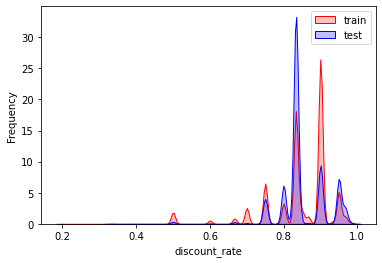

In [61]:
ax = sns.kdeplot(df_train[(df_train.label>=0)&(df_train.discount_rate>=0)]['discount_rate'], color="Red", shade=True)
ax = sns.kdeplot(df_test[(df_test.discount_rate>=0)]['discount_rate'], color="Blue", shade=True)
ax.set_xlabel('discount_rate')
ax.set_ylabel("Frequency")
ax = ax.legend(["train","test"])

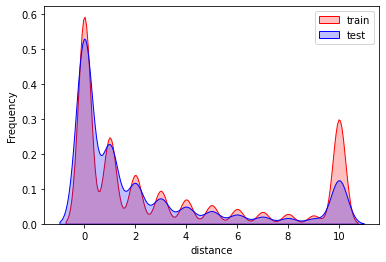

In [62]:
ax = sns.kdeplot(df_train[(df_train.label>=0)&(df_train.distance>=0)]['distance'], color="Red", shade=True)
ax = sns.kdeplot(df_test[(df_test.distance>=0)]['distance'], color="Blue", shade=True)
ax.set_xlabel('distance')
ax.set_ylabel("Frequency")
ax = ax.legend(["train","test"])

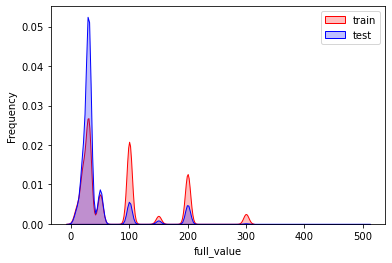

In [64]:
ax = sns.kdeplot(df_train[(df_train.label>=0)&(df_train.full_value>=0)]['full_value'], color="Red", shade=True)
ax = sns.kdeplot(df_test[(df_test.full_value>=0)]['full_value'], color="Blue", shade=True)
ax.set_xlabel('full_value')
ax.set_ylabel("Frequency")
ax = ax.legend(["train","test"])

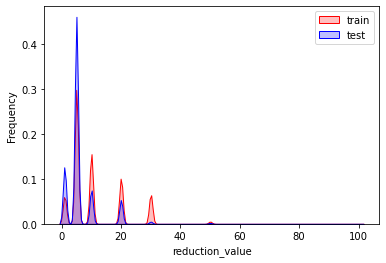

In [63]:
ax = sns.kdeplot(df_train[(df_train.label>=0)&(df_train.reduction_value>=0)]['reduction_value'], color="Red", shade=True)
ax = sns.kdeplot(df_test[(df_test.reduction_value>=0)]['reduction_value'], color="Blue", shade=True)
ax.set_xlabel('reduction_value')
ax.set_ylabel("Frequency")
ax = ax.legend(["train","test"])

## 可视化线性关系

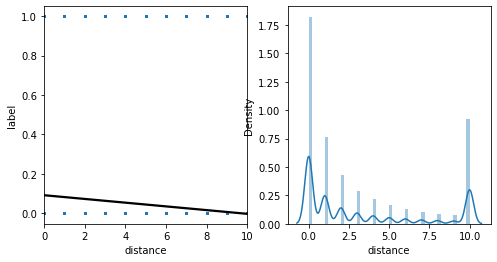

In [65]:
fcols = 2
frows = 1
plt.figure(figsize=(8,4))
ax=plt.subplot(1,2,1)
sns.regplot(x='distance', y='label', data=df_train[(df_train.label>=0)&(df_train.distance>=0)][['distance','label']], ax=ax, 
            scatter_kws={'marker':'.','s':3,'alpha':0.3},
            line_kws={'color':'k'});
plt.xlabel('distance')
plt.ylabel('label')
ax=plt.subplot(1,2,2)
sns.distplot(df_train[(df_train.label>=0)&(df_train.distance>=0)]['distance'].dropna())
plt.xlabel('distance')
plt.show()

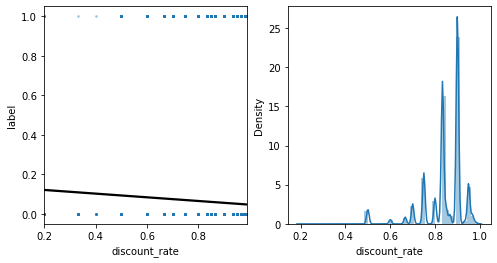

In [66]:
fcols = 2
frows = 1
plt.figure(figsize=(8,4))
ax=plt.subplot(1,2,1)
sns.regplot(x='discount_rate', y='label', data=df_train[(df_train.label>=0)&(df_train.discount_rate>=0)][['discount_rate','label']], ax=ax, 
            scatter_kws={'marker':'.','s':3,'alpha':0.3},
            line_kws={'color':'k'});
plt.xlabel('discount_rate')
plt.ylabel('label')
ax=plt.subplot(1,2,2)
sns.distplot(df_train[(df_train.label>=0)&(df_train.discount_rate>=0)]['discount_rate'].dropna())
plt.xlabel('discount_rate')
plt.show()